In [4]:
import pandas as pd
import seaborn as sns
import matplotlib as plt

# set seaborn plotting style
sns.set_style("dark")

### Load Usahawan dataset

In [5]:

df = pd.read_excel("data/Data Usahawan.xlsx")

# show the first five 
df.head()

,Bil,Nama Usahawan,No K/P,Agensi,Jantina,No Telefon Bimbit,Kategori Usahawan,Syarikat
0,1,SITI ROHANI BT A BAKAR,[820210115206],KETENGAH,Perempuan,[0148073647],"START-UP (ST) - < RM24,000","TEST,TEST2"
1,2,HAJJAH RAZIANA HANIFA,[640716075784],PERDA,Perempuan,[0125109160],PIQO (P) - > RM24k <=RM60k,JASZ TRADING
2,3,PAIRUS BINTI ISMAIL,[760814085704],PERDA,Lelaki,[0175323952],PIQO (P) - > RM24k <=RM60k,FAIRUS SAUJANA ENTRERPRISE
3,4,MUHAMAD AKASYAH BIN KHAIRUDIN,[990105027089],PERDA,Lelaki,[01128400810],PIQO (P) - > RM24k <=RM60k,MUHAMAD AKASYAH BIN KHAIRUDIN
4,5,MOHAMMAD YUSOFF BIN SHAIK ISMAIL,[79123075131],PERDA,Lelaki,[0189424849],MIKRO (M) - > RM150k <= RM300k,MYSIS TRADING


In [6]:
# Drop rows with NaN
df = df.dropna()

### Participants by agency

In [16]:
dff = df["Agensi"].value_counts()

# convert series to dataframe
dff = dff.reset_index()
dff.columns = ['Agensi', 'Freq']

[Text(0, 0, 'MARA'),
 Text(1, 0, 'PERDA'),
 Text(2, 0, 'KESEDAR'),
 Text(3, 0, 'KEMAS'),
 Text(4, 0, 'SPED'),
 Text(5, 0, 'KEDA'),
 Text(6, 0, 'KETENGAH'),
 Text(7, 0, 'KEJORA'),
 Text(8, 0, 'RBC'),
 Text(9, 0, 'BDA'),
 Text(10, 0, 'PKPP')]

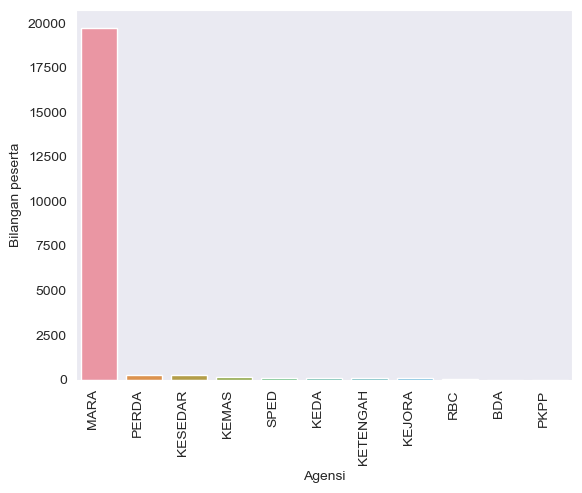

In [34]:
# bar plot of frequency
ax = sns.barplot(x = "Agensi", y = "Freq", data = dff)

# configure plot labels
ax.set(xlabel="Agensi", ylabel="Bilangan peserta")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

<Axes: ylabel='Agensi'>

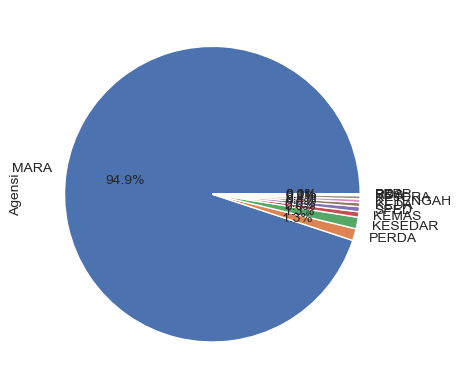

In [36]:
#seaborn library
colors = sns.color_palette("deep")[0:10]

df["Agensi"].value_counts().plot(kind="pie", colors=colors, autopct="%.1f%%")

### Participants by category

In [37]:
dff = df["Kategori Usahawan"].value_counts()

# convert series to dataframe
dff = dff.reset_index()
dff.columns = ["Kategori Usahawan", 'Freq']

[Text(0, 0, 'START-UP (ST) - < RM24,000'),
 Text(1, 0, 'PIQO (P) - > RM24k <=RM60k'),
 Text(2, 0, 'MIKRO (M) - > RM150k <= RM300k'),
 Text(3, 0, 'NANO (N) - > RM60k<= RM150k'),
 Text(4, 0, 'KECIL (K) - > RM300k <=RM15j'),
 Text(5, 0, 'SEDERHANA (S) - > RM15j <= RM50j')]

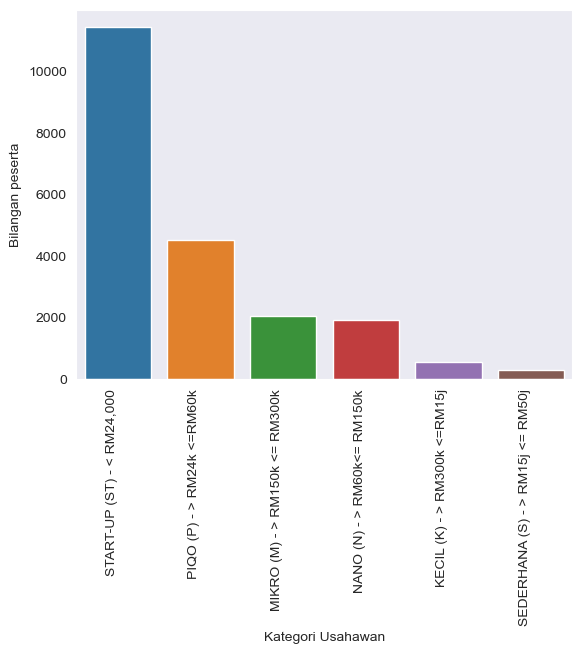

In [38]:
# bar plot of frequency
ax = sns.barplot(x = "Kategori Usahawan", y = "Freq", data = dff)

# configure plot labels
ax.set(xlabel="Kategori Usahawan", ylabel="Bilangan peserta")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')

<Axes: ylabel='Kategori Usahawan'>

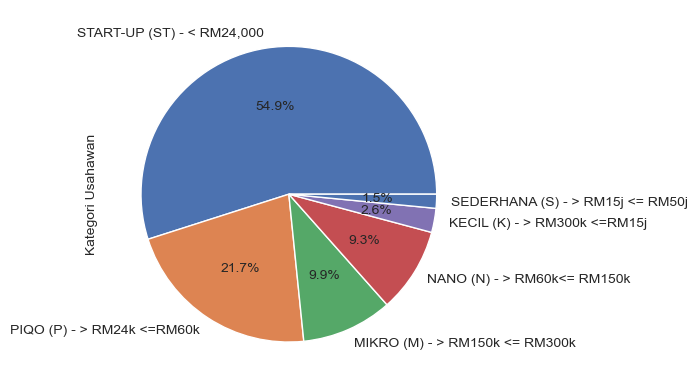

In [39]:
#seaborn library
colors = sns.color_palette("deep")[0:5]

df["Kategori Usahawan"].value_counts().plot(kind="pie", colors=colors, autopct="%.1f%%")

### Participant age

In [43]:
# Processing age by IC number
ic = df["No K/P"].str.strip('[]')
df["Umur"] = ic.astype(str).str[:2]
df = df[pd.to_numeric(df["Umur"], errors='coerce').notnull()]
df.head()

,Bil,Nama Usahawan,No K/P,Agensi,Jantina,No Telefon Bimbit,Kategori Usahawan,Syarikat,Umur
0,1,SITI ROHANI BT A BAKAR,[820210115206],KETENGAH,Perempuan,[0148073647],"START-UP (ST) - < RM24,000","TEST,TEST2",82
1,2,HAJJAH RAZIANA HANIFA,[640716075784],PERDA,Perempuan,[0125109160],PIQO (P) - > RM24k <=RM60k,JASZ TRADING,64
2,3,PAIRUS BINTI ISMAIL,[760814085704],PERDA,Lelaki,[0175323952],PIQO (P) - > RM24k <=RM60k,FAIRUS SAUJANA ENTRERPRISE,76
3,4,MUHAMAD AKASYAH BIN KHAIRUDIN,[990105027089],PERDA,Lelaki,[01128400810],PIQO (P) - > RM24k <=RM60k,MUHAMAD AKASYAH BIN KHAIRUDIN,99
4,5,MOHAMMAD YUSOFF BIN SHAIK ISMAIL,[79123075131],PERDA,Lelaki,[0189424849],MIKRO (M) - > RM150k <= RM300k,MYSIS TRADING,79


In [44]:
age = df["Umur"].astype(int)
df["Umur"] = abs(2023-age).astype(str).str[-2:].astype(int)

<Axes: xlabel='Umur', ylabel='Count'>

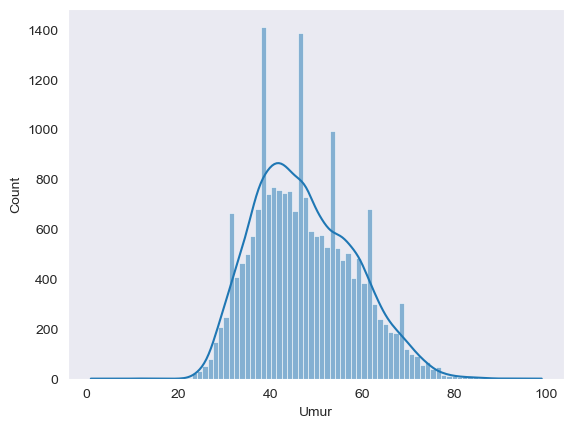

In [42]:
# Age histogram
sns.histplot(data=df["Umur"], kde=True)

<Axes: xlabel='Umur', ylabel='Count'>

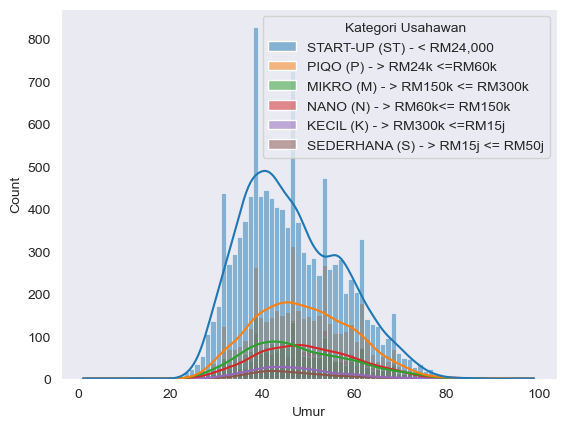

In [47]:
# Age histogram by "Kategory Usahawan"
sns.histplot(data=df, kde=True, x = "Umur", hue = "Kategori Usahawan")